In [ ]:
import random as ra #importa o modulo que oferece a função para gerar os numeros aleatórios
from typing import Dict # utilizo para anotação que a variavel é um dicionario
import pandas as pd

class Dado:
    def __init__(self,lado: int = 6): # aqui defino a variavel dizendo que ela é um inteiro com o valor 6 que é a quantidade de lados por padrão
        self.__lado = lado # armazena o numero de lados
        self.__valor = 1 # valor atual do dado inicia com 1

    def lancar(self) -> None: #define o metodo lançar do dado sem retornar nada
        self.__valor = ra.randint(1, self.__lado) # Atribui um numero aleatorio entre 1 e o numero de lados

    def get_valor(self) -> int:
        return self.__valor

    def __add__(self, outro: 'Dado') -> int: #aqui uso a sobrecarca de operador de adição e indico que é um inteiro
        return self.get_valor() + outro.get_valor()

# aqui em baixo defino uma função que simula o lançamento dos dois dados com o numero de lançamentos e o numero de lados
def simula_lancamento(num_lancamento: int, lado_dado1: int, lado_dado2: int) -> Dict[int, int]:
    dado1 = Dado(lado_dado1) # crio duas instancias da classe Dado cada uma com a quantidade de lados
    dado2 = Dado(lado_dado2)
    resultado = {} # crio um dicionario vazio

# aqui em baixo crio um loop para repetir os lançamentos dos dois dados
    for _ in range(num_lancamento):
        dado1.lancar()
        dado2.lancar() # chama o metodo Lançar
        soma = dado1 + dado2 # soma os dois dados e guarda na variavel soma
        resultado[soma] = resultado.get(soma, 0) + 1 # incrementa a contagem no dicionário e se não tiver nada entra com 0
    return resultado

# aqui em baixo defino a função onde aceita o dicionario de resultados e o total de lançamentos
def mostra_resultado(resultado: Dict[int, int],num_lancamento: int) -> None:
    print('resultado da soma | (%)') # imprime o cabeçalho
    for soma in sorted(resultado.keys()): # Loop com a soma ordenadas da chaves do dicionário
        print(f"{soma:<17} | {resultado[soma] / num_lancamento * 100:.2f}") #Imprime a soma e a % da soma com o nº de lançamentos com duas casas decimais




In [ ]:
resultado = simula_lancamento(10000, 6, 6)
mostra_resultado(resultado, 10000)


resultado da soma | (%)
2                 | 3.04
3                 | 5.98
4                 | 8.25
5                 | 11.09
6                 | 14.23
7                 | 15.80
8                 | 14.30
9                 | 10.76
10                | 8.30
11                | 5.59
12                | 2.66


In [ ]:

resultado = simula_lancamento(10000, 10, 10)
mostra_resultado(resultado, 10000)

resultado da soma | (%)
2                 | 1.37
3                 | 1.80
4                 | 2.87
5                 | 3.75
6                 | 5.08
7                 | 6.09
8                 | 6.69
9                 | 7.71
10                | 9.24
11                | 10.29
12                | 9.36
13                | 7.94
14                | 7.29
15                | 5.69
16                | 5.13
17                | 3.97
18                | 2.95
19                | 1.82
20                | 0.96


In [ ]:

resultado = simula_lancamento(10000, 8, 12)
mostra_resultado(resultado, 10000)


resultado da soma | (%)
2                 | 1.04
3                 | 2.19
4                 | 2.87
5                 | 3.88
6                 | 5.24
7                 | 5.76
8                 | 7.17
9                 | 8.25
10                | 8.47
11                | 8.23
12                | 8.16
13                | 8.45
14                | 7.67
15                | 6.32
16                | 5.45
17                | 4.13
18                | 3.32
19                | 2.44
20                | 0.96


In [ ]:

resultado_tabeta = pd.Series(resultado)
mostra_tabeta = pd.DataFrame(resultado_tabeta)
mostra_tabeta.sort_index()

,0
2,104
3,219
4,287
5,388
6,524
7,576
8,717
9,825
10,847
11,823


In [ ]:
"""levando em consideração a prova matematica sendo que o menor valor quando lançados os dois dados é 2
e a soma máxima é a soma dos maiores números em cada dado é 12.
para dados de 6 lados a um total de 36 combinações possiveis especificando como:
para soma de  2   TEMOS   1 COMBINAÇÃO POSSIVEL
              3           2
              4           3
              5           4
              6           5
              7           6
              8           5
              9           4
              10          3
              11          2
              12          1

Por exemplo, para a soma 7:
O max_min é o menor valor entre 7 - 1 (6), 6 (lados do primeiro dado) e 6 (lados do segundo dado) o que resulta em 6.
O min_max é o maior valor entre 1 (o menor valor possível de um dado) e 7 - 6 (lado máximo de um dos dados), que é 2.
A probabilidade teórica de obter a soma 7 é então calculada como (6 - 2 + 1) / (6 * 6) = 5 / 36 ou 13.89%.

A baixo vou fazer o mesmo problema de outra forma """

In [61]:
import random
from collections import defaultdict
import pandas as pd

class Dado_Modificado:
    def __init__(self, lados: int):
        self.__lados = lados
        self.__valor = 0

    def lancar(self):
        self.__valor = random.randint(1, self.__lados)

    def get_valor(self):
        return self.__valor

    def __add__(self, outro):
        return self.__valor + outro.get_valor()

def lancamento_2(num_lados_dado1: int, num_lados_dado2: int) -> dict:
    dado1 = Dado_Modificado(num_lados_dado1)
    dado2 = Dado_Modificado(num_lados_dado2)
    resultados = defaultdict(int)

    for _ in range(10000):
        dado1.lancar()
        dado2.lancar()
        soma = dado1 + dado2
        resultados[soma] += 1

    return resultados

def probabilidades_teoricas(num_lados_dado1: int, num_lados_dado2: int) -> pd.DataFrame:
    prob_teorica = {}
    for soma in range(2, num_lados_dado1 + num_lados_dado2 + 1):
        max_min = min(soma - 1, num_lados_dado1, num_lados_dado2) #Menor valor entre a soma atual menos 1, o número de lados do primeiro e do  segundo dado.
        min_max = max(1, soma - max(num_lados_dado1, num_lados_dado2)) #Maior valor entre 1 e a soma atual menos o maior valor entre o número de lados do primeiro e segundo dado.
        prob_teorica[soma] = (max_min - min_max + 1) / (num_lados_dado1 * num_lados_dado2)

    return pd.DataFrame(list(prob_teorica.items()), columns=['Soma', 'Teórica'])


def pedir_lados_dado(mensagem):
    while True:
        try:
            num_lados = int(input(mensagem))
            if num_lados in [6, 8, 10, 12]:
                return num_lados
            else:
                print("Valor inválido. Por favor, escolha entre 6, 8, 10 ou 12.")
        except ValueError:
            print("Entrada inválida. Por favor, digite um número inteiro.")

num_lados_dado1 = pedir_lados_dado("Informe os lados do primeiro dado (6, 8, 10, 12): ")
num_lados_dado2 = pedir_lados_dado("Informe os lados do segundo dado (6, 8, 10, 12): ")

resultados = lancamento_2(num_lados_dado1, num_lados_dado2)
df_prob_teoricas = probabilidades_teoricas(num_lados_dado1, num_lados_dado2)

df_resultados = pd.DataFrame(list(resultados.items()), columns=['Somatória', 'Quantidade'])
df_resultados['Experimental'] = df_resultados['Quantidade'] / 10000

resultado_final['Experimental (%)'] = (resultado_final['Experimental'] * 100).round(2).astype(str) + '%'
resultado_final['Teórica (%)'] = (resultado_final['Teórica'] * 100).round(2).astype(str) + '%'
resultado_final['Diferença (%)'] = (resultado_final['Diferença'] * 100).round(2).astype(str) + '%'

resultado_final.sort_values(by='Somatória')[['Somatória', 'Quantidade', 'Experimental (%)', 'Teórica (%)', 'Diferença (%)']]


Informe os lados do primeiro dado (6, 8, 10, 12): 6
Informe os lados do segundo dado (6, 8, 10, 12): 6


,Somatória,Quantidade,Experimental (%),Teórica (%),Diferença (%)
10,2,280,2.8%,2.78%,-0.02%
6,3,572,5.72%,5.56%,-0.16%
0,4,824,8.24%,8.33%,0.09%
5,5,1139,11.39%,11.11%,-0.28%
1,6,1396,13.96%,13.89%,-0.07%
2,7,1581,15.81%,16.67%,0.86%
7,8,1427,14.27%,13.89%,-0.38%
4,9,1110,11.1%,11.11%,0.01%
8,10,834,8.34%,8.33%,-0.01%
3,11,572,5.72%,5.56%,-0.16%


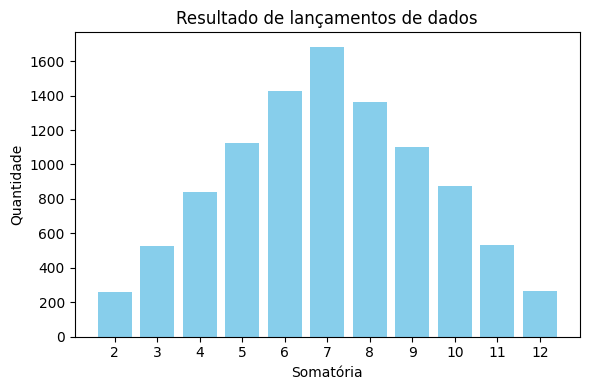

In [62]:
import matplotlib.pyplot as plt


def plotar_resultados(df_resultados):

    df_ordenado = df_resultados.sort_values(by='Somatória')

    plt.figure(figsize=(6, 4))

    plt.bar(df_ordenado['Somatória'], df_ordenado['Quantidade'], color='skyblue')

    plt.title('Resultado de lançamentos de dados')
    plt.xlabel('Somatória')
    plt.ylabel('Quantidade')
    plt.xticks(df_ordenado['Somatória'])

    plt.tight_layout()
    plt.show()

plotar_resultados(df_resultados)